In [3]:
import geopandas as gpd

In [4]:
huc = gpd.read_file('qgis/C-Pennsylvania_3/box_hucs.shp')

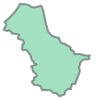

In [5]:
huc.iloc[0].geometry

In [6]:
huc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
huc_carbs = gpd.read_file('./USGS-Karst-Map/Dissolved_carbonates_seperate_polys_E_B3.shp', mask=huc.iloc[0].geometry)

In [8]:
huc_carbs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

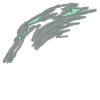

In [9]:
import matplotlib.pyplot as plt
huc_carbs.iloc[0].geometry

In [10]:
huc_carbs

,fid,KARST_TYPE,Climate,Induration,Exposure,ROCKTYPE1,ROCKTYPE2,ROCKTYPE3,UNIT_NAME,UNIT_AGE,...,UNIT_LINK,URL,NA_L3NAME,NA_L3CODE,COMMENTS,Shape_Leng,Shape_Area,layer,path,geometry
0,1.0,Carbonate rocks buried under =50 ft of glacial...,dry,Consolidated,B3,limestone,limestone,shale; clay or mud; sand,Niobrara Formation,Late Cretaceous,...,SDKn;0,http://mrdata.usgs.gov/geology/state/sgmc-unit...,Northwestern Glaciated Plains,9.3.1,NaN,2320.43139,121422.43149,Exposure_B3,/home/mcoving/tmp/Exposure_B3.gpkg|layername=E...,"POLYGON ((-78.81930 39.59095, -78.82054 39.590..."


In [11]:
carbs_dissolved = huc_carbs.dissolve()

In [13]:
geom = huc.iloc[0].geometry

In [14]:
carbs_only_huc = geom.intersection(carbs_dissolved.iloc[0].geometry)

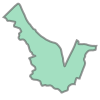

In [15]:
carbs_only_huc

In [52]:
huc.iloc[0]

objectid                                                  70517
tnmid                    {448BC310-955E-4E26-8652-D122E154B919}
metasource                                                  NaN
sourcedata                                                  NaN
sourceorig                                                  NaN
sourcefeat                                                  NaN
loaddate                                   2013-01-18T07:08:53Z
gnis_id                                                     NaN
areaacres                                              11113.19
areasqkm                                                  44.97
states                                                       PA
huc12                                              020503020103
name                                                 Plum Creek
hutype                                                        S
humod                                                        KA
tohuc                                   

In [38]:
import rasterio as rio


In [17]:
dem_src = rio.open('qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif')

In [18]:
ndv = dem_src.nodata
ndv

nan

In [19]:
dem_src.crs

CRS.from_epsg(4326)

In [27]:
ndv

nan

In [35]:
dem_untrimmed = dem_src.read()
len(dem_untrimmed[dem_untrimmed>0])

1801270

In [40]:
out_image, out_transform = mask.mask(dem_src, [carbs_only_huc], crop=True, nodata=ndv)

In [41]:
len(out_image[out_image>0])

1056544

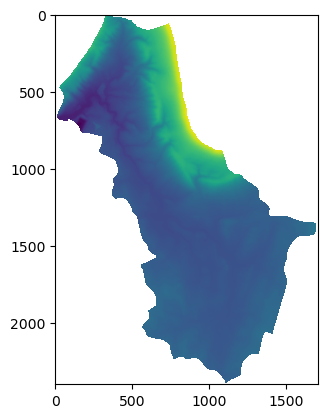

In [20]:
plt.imshow(dem_src.read()[0])

In [39]:
import rasterio.mask as mask


In [7]:
from whitebox.whitebox_tools import WhiteboxTools


In [71]:
out_image, out_transform = mask.mask(dem_src, [carbs_only_huc], crop=True, nodata=ndv)

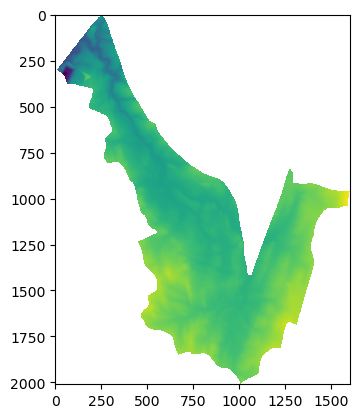

In [73]:
plt.imshow(out_image[0])

In [1]:
from sinkhole_functions import calc_karst_fraction

In [2]:
calc_karst_fraction('./qgis/C-Pennsylvania_3/020503020103/','020503020103-USGS.tif', 
                    sinksfile='qgis/C-Pennsylvania_3/020503020103/020503020103-sinks-karst_depression_polys_conus.tif',
                    basefilename='test')

./whitebox_tools --run="MeanFilter" --input='/home/mcoving/github/sinkhole_analysis/qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif' --output='/home/mcoving/github/sinkhole_analysis/qgis/C-Pennsylvania_3/020503020103/020503020103-USGS-smoothed.tif' --filterx=5 --filtery=5 -v --compress_rasters=False

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 9%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17

0.0

In [9]:
wbt = WhiteboxTools()


In [5]:
!ls ./qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif

./qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif


In [12]:
wbt.mean_filter('/home/mcoving/github/sinkhole_analysis/qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif', 'test-smoothed.tif', 5, 5)

./whitebox_tools --run="MeanFilter" --input='/home/mcoving/github/sinkhole_analysis/qgis/C-Pennsylvania_3/020503020103/020503020103-USGS.tif' --output='test-smoothed.tif' --filterx=5 --filtery=5 -v --compress_rasters=False

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************


Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 9%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 18%
Creating integral images: 19%
Creating integral images: 20%
Creating integral images: 21%
Creating integral images: 22%
Creating integral images: 23%
Creating integral images: 24%
Creating integral images: 25%
Creating integral images: 26%
Creating integral images: 27%
Creating integral images: 28%
Creating integral images: 29%
Creating integral images: 30%
Creating integral images: 31%
Creating integral images: 32%
Crea

0

In [13]:
import os

In [ ]:
os.path.abspath